6.1 Working with the text data

In [1]:
# 6.1.1. One-hot encoding of words
import numpy as np
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1
max_length = 10
results = np.zeros(shape=(len(samples),
                                    max_length,
                                    max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1
print(results)


[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


In [2]:
#6.1.1. One-hot encoding with character-level
import string
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable
token_index = dict(zip(range(1, len(characters) + 1), characters))
max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1
print(results)

[[[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [3]:
#Using Keras for word-leve one-hot encoding
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [4]:
#Word-level one-hot encoding with hashing trick
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
dimensionality = 1000
max_length = 10
results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        #hash word into random integer index between 0 and 1000
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1
print(results)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [5]:
#6.1.2 LLoading the IDMB data for use with an Embedding layer
from keras.datasets import imdb
from keras.utils import pad_sequences
max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
#turn the list of integers into a @D integer tensor of shape(sample, maxlen)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


In [6]:
#Using an Embedding layer and classifier on the IMDB data
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding
model = Sequential()
#set maximun input lenght ==> activation have shape(samples, maxlen, 8)
model.add(Embedding(10000, 8, input_length=maxlen))
#flatten the 3D tensor into 2D tensor of shape(samples, maxlen*8)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6727 - acc: 0.6160 - val_loss: 0.6254 - val_acc: 0.7022
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5487 - acc: 0.7499 - val_loss: 0.5302 - val_acc: 0.7302
Epoch 3/10
625/625 [==============================] 

In [34]:
#6.1.3 Putting it all together: from raw text to word embeddings

#get database
import os
imdb_dir = 'aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [35]:
#tokenizing the data
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
indices = np.arange(data.shape[0])
#data ordered 
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [20]:
#parsing the Glove word-embedding files
glove_dir = 'glove.6B'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [21]:
#parsing the glove word-embeddings matrix
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            #words not found replace with 0
            embedding_matrix[i] = embedding_vector

In [36]:
#model
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_5 (Flatten)         (None, 10000)             0         
                                                                 
 dense_9 (Dense)             (None, 32)                320032    
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [37]:
#loading pretrained word embeddings into Embedding layer
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [38]:
#training and evaluation
model.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['acc'])
history = model.fit(x_train, y_train,
            epochs=10,
            batch_size=32,
            validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 2s 164ms/step - loss: 1.4040 - acc: 0.5050 - val_loss: 0.6945 - val_acc: 0.5046
Epoch 2/10
7/7 [==============================] - 1s 166ms/step - loss: 0.6399 - acc: 0.6650 - val_loss: 0.7812 - val_acc: 0.4990
Epoch 3/10
7/7 [==============================] - 2s 251ms/step - loss: 0.5914 - acc: 0.7050 - val_loss: 0.7357 - val_acc: 0.5079
Epoch 4/10
7/7 [==============================] - 1s 213ms/step - loss: 0.5080 - acc: 0.6950 - val_loss: 0.7395 - val_acc: 0.4960
Epoch 5/10
7/7 [==============================] - 1s 167ms/step - loss: 0.4955 - acc: 0.8350 - val_loss: 1.8677 - val_acc: 0.4910
Epoch 6/10
7/7 [==============================] - 1s 168ms/step - loss: 0.3960 - acc: 0.8050 - val_loss: 1.0766 - val_acc: 0.5018
Epoch 7/10
7/7 [==============================] - 1s 168ms/step - loss: 0.1648 - acc: 0.9500 - val_loss: 0.8840 - val_acc: 0.5008
Epoch 8/10
7/7 [==============================] - 1s 151ms/step - loss: 0.1554 - acc: 0.96

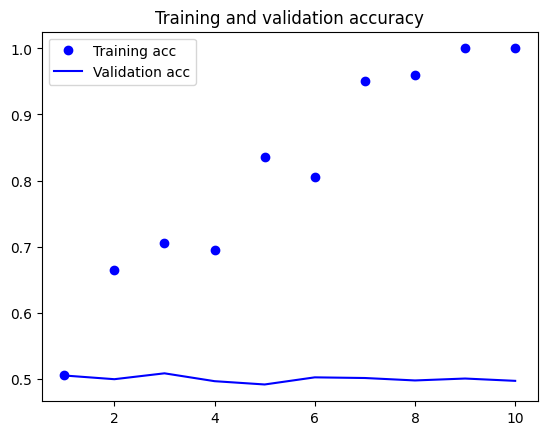

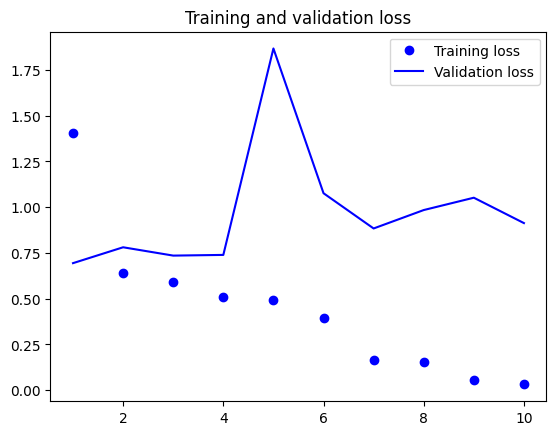

In [39]:
#plotting results
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [40]:
#train without pretrain word embedding
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model1 = Sequential()
model1.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model1.add(Flatten())
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()
model1.compile(optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['acc'])
history = model1.fit(x_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(x_val, y_val))
model1.save_weights('trained_glove_model.h5')

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_6 (Flatten)         (None, 10000)             0         
                                                                 
 dense_11 (Dense)            (None, 32)                320032    
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 2s 186ms/step - loss: 0.6917 - acc: 0.5100 - val_loss: 0.6938 - val_acc: 0.5075
Epoch 2/10
7/7 [==============================

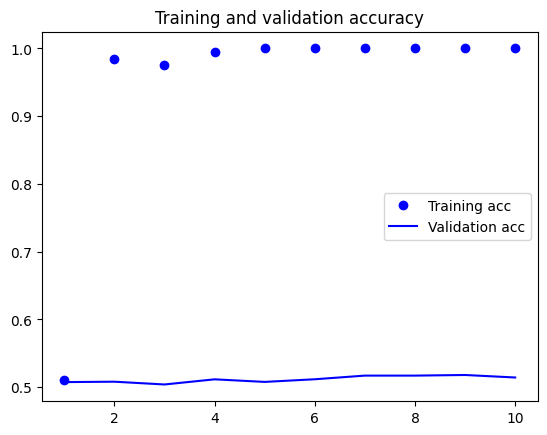

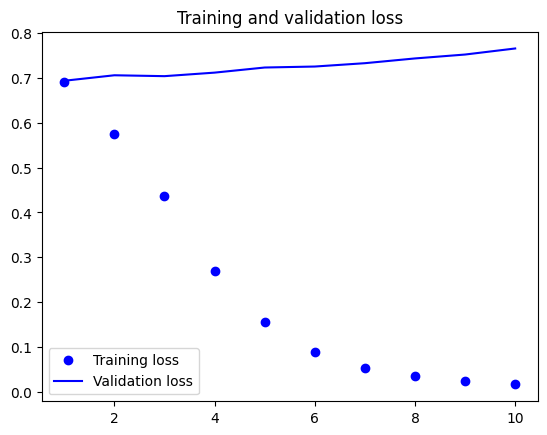

In [41]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [43]:
#tokenizing the data of the test set
test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [44]:
#evaluting first model on test set
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)


539/539 [==============================] - 2s 3ms/step - loss: 1.0166 - acc: 0.4443


[1.016573190689087, 0.4442962408065796]

In [45]:
#evaluting second model on test set
model1.load_weights('trained_glove_model.h5')
model1.evaluate(x_test, y_test)

539/539 [==============================] - 1s 3ms/step - loss: 0.8401 - acc: 0.4293


[0.8400703072547913, 0.4293336570262909]

6.2. Understanding recurrent neutral networks (RNN)

6.2.1. A recurrnt layer in Keras

In [47]:
#numpy with simple RNN
import numpy as np
timesteps = 100
input_features = 32
output_features = 64
inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))
successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
final_output_sequence = np.concatenate(successive_outputs, axis=0)


In [48]:
#RNN with Keras
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [49]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [50]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [51]:
#preparing the IMDB data
from keras.datasets import imdb
from keras.utils import pad_sequences
max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
    num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [53]:
#train with Embedding and SimpleRNN layer
from keras.layers import Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 29s 172ms/step - loss: 0.5898 - acc: 0.6798 - val_loss: 0.4337 - val_acc: 0.8132
Epoch 2/10
157/157 [==============================] - 26s 163ms/step - loss: 0.3743 - acc: 0.8447 - val_loss: 0.3658 - val_acc: 0.8506
Epoch 3/10
157/157 [==============================] - 25s 157ms/step - loss: 0.3007 - acc: 0.8792 - val_loss: 0.3775 - val_acc: 0.8376
Epoch 4/10
157/157 [==============================] - 27s 175ms/step - loss: 0.2460 - acc: 0.9049 - val_loss: 0.3878 - val_acc: 0.8260
Epoch 5/10
157/157 [==============================] - 24s 156ms/step - loss: 0.1859 - acc: 0.9330 - val_loss: 0.3944 - val_acc: 0.8296
Epoch 6/10
157/157 [==============================] - 26s 166ms/step - loss: 0.1345 - acc: 0.9535 - val_loss: 0.3814 - val_acc: 0.8628
Epoch 7/10
157/157 [==============================] - 29s 187ms/step - loss: 0.0963 - acc: 0.9671 - val_loss: 0.4287 - val_acc: 0.8636
Epoch 8/10
157/157 [==============================] - 2

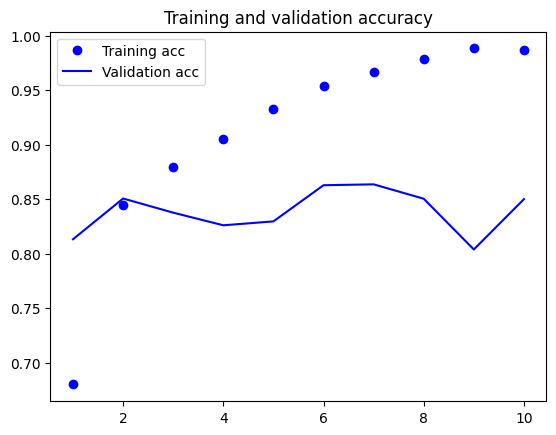

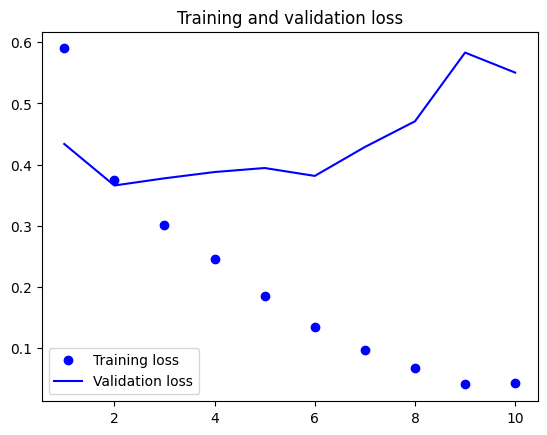

In [54]:
#plotting results
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

6.2.2. LSTM and GRU layers

In [ ]:
#concrete LSTM example in Keras
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['acc'])
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 73s 441ms/step - loss: 0.5918 - acc: 0.6768 - val_loss: 0.4207 - val_acc: 0.8146
Epoch 2/10
157/157 [==============================] - 70s 448ms/step - loss: 0.3540 - acc: 0.8543 - val_loss: 0.3852 - val_acc: 0.8424
Epoch 3/10
157/157 [==============================] - 72s 461ms/step - loss: 0.2708 - acc: 0.8949 - val_loss: 0.3645 - val_acc: 0.8434
Epoch 4/10
157/157 [==============================] - 68s 435ms/step - loss: 0.2375 - acc: 0.9111 - val_loss: 0.4120 - val_acc: 0.8664
Epoch 5/10
157/157 [==============================] - 65s 412ms/step - loss: 0.2011 - acc: 0.9269 - val_loss: 0.3267 - val_acc: 0.8566
Epoch 6/10
157/157 [==============================] - 63s 398ms/step - loss: 0.1824 - acc: 0.9330 - val_loss: 0.3206 - val_acc: 0.8864
Epoch 7/10
157/157 [==============================] - 61s 390ms/step - loss: 0.1668 - acc: 0.9391 - val_loss: 0.3757 - val_acc: 0.8696
Epoch 8/10
157/157 [==============================] - 6

6.3. Advanced use of RNN

6.3.1. A temperatur-forecasting problem

In [55]:
import os
fname = os.path.join('', 'jena_climate_2009_2016.csv')
f = open(fname, encoding='utf-8')
data = f.read()
f.close()
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]
print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [56]:
#parsing the data
import numpy as np
float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

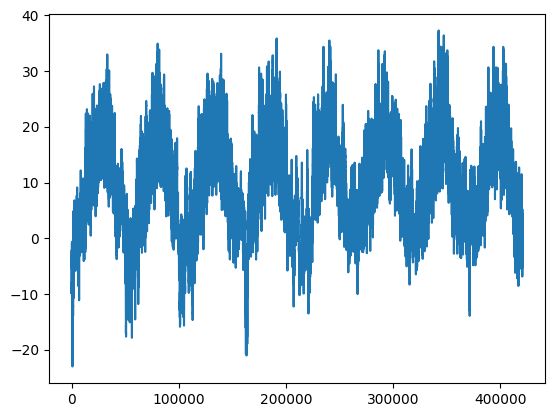

In [12]:
#plotting the temperatur timeseries
from matplotlib import pyplot as plt
temp = float_data[:, 1] 
plt.plot(range(len(temp)), temp)

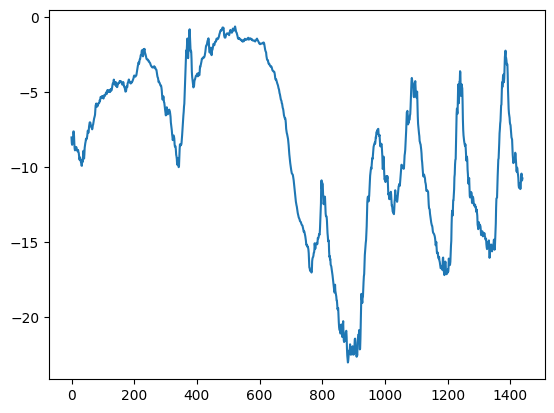

In [13]:
#ploting the first 10 days (a record every 10 minutes ==> 144 data points per day)
plt.plot(range(1440), temp[:1440]);

In [57]:
#nomarlizing the data
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [58]:
#generator yielding timeseries samples and their targets
def generator(data, lookback, delay, min_index, max_index,
            shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                    min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows),
            lookback // step,
            data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
    yield samples, targets

In [59]:
#preparing the training, validation and test genarations
lookback = 1440
step = 6
delay = 144
batch_size = 128
train_gen = generator(float_data,
            lookback=lookback,
            delay=delay,
            min_index=0,
            max_index=200000,
            shuffle=True,
            step=step,
            batch_size=batch_size)
val_gen = generator(float_data,
            lookback=lookback,
            delay=delay,
            min_index=200001,
            max_index=300000,
            step=step,
            batch_size=batch_size)
test_gen = generator(float_data,
            lookback=lookback,
            delay=delay,
            min_index=300001,
            max_index=None,
            step=step,
            batch_size=batch_size)
val_steps = (300000 - 200001 - lookback)
test_steps = (len(float_data) - 300001 - lookback)

6.3.3. Common-sense, none-ml baseline

6.4. A basic ML approach

In [60]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                steps_per_epoch=500,
                epochs=20,
                validation_data=val_gen,
                validation_steps=val_steps)


C:\Users\hoang\AppData\Local\Temp\ipykernel_16892\162475033.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen,


In [1]:
#ploting results
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

NameError: name 'history' is not defined

6.3.5. A first recurrent baseline

In [2]:
#training and evaluting a GRU-based model
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                steps_per_epoch=500,
                epochs=20,
                validation_data=val_gen,
                validation_steps=val_steps)

NameError: name 'float_data' is not defined

6.3.6. Using recurrent dropout to fight overfitting

In [ ]:
#train and evaluate a dropout-regularzied GRU-based model
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32,
            dropout=0.2,
            recurrent_dropout=0.2,
            input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
            steps_per_epoch=500,
            epochs=40,
            validation_data=val_gen,
            validation_steps=val_steps)